In [73]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn import datasets, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
breast = datasets.load_breast_cancer()

X = breast.data[:, [1, 2]]
y = breast.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

In [75]:
print(f"Class Labels:       {np.unique(y)}") 
print(f"Total Label Count:  {np.bincount(y)}")
print(f"Train Label Count:  {np.bincount(y_train)}")
print(f"Test Label Count:   {np.bincount(y_test)}")

Class Labels:       [0 1]
Total Label Count:  [212 357]
Train Label Count:  [191 321]
Test Label Count:   [21 36]


In [76]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

perceptron = Perceptron(eta0=0.01, random_state=1)
perceptron.fit(X_train_std, y_train)

y_pred = perceptron.predict(X_test_std)

print(f"Misclassified Examples: {(y_test != y_pred).sum()}")
print(f"Model Accuracy: {round((accuracy_score(y_test, y_pred)*100), 2)}%")

Misclassified Examples: 3
Model Accuracy: 94.74%


In [77]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Setup marker generator and color map
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for index, lbl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == lbl, 0], y=X[y == lbl, 1], alpha=0.8, 
            c=colors[index], marker=markers[index], label=lbl, 
            edgecolor="black")
    
    # Highlight test examples
    if test_idx:
        # Plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1], c="black", edgecolor="black", 
            alpha=1.0, linewidth=1, marker="o", s=25, label="test set")

C:\Users\ANONYM~1\AppData\Local\Temp/ipykernel_2144/404459121.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == lbl, 0], y=X[y == lbl, 1], alpha=0.8,


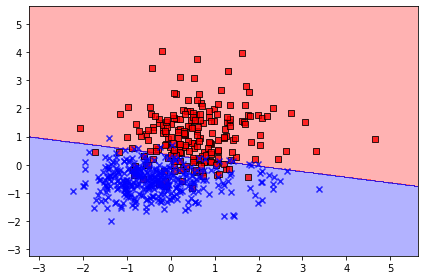

In [78]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=perceptron)
plt.xticks()
plt.yticks()
plt.tight_layout()